In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
from sklearn.model_selection import train_test_split 
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25,
                                                    random_state = 0)

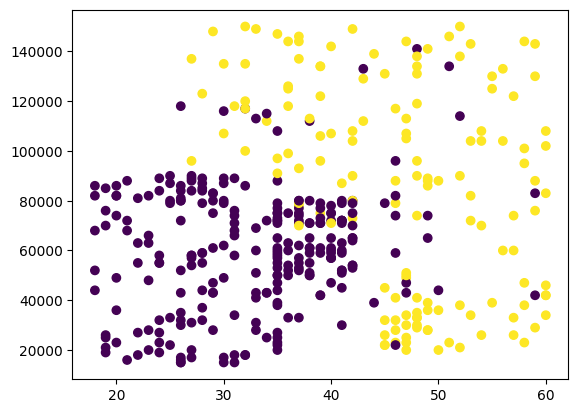

In [66]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = "viridis")

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,0
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [24]:
y_pred = classifier.predict(X_test)

In [25]:
compare = np.concatenate((y_pred.reshape(len(y_pred),1),
                          y_test.reshape(len(y_test),1)) ,1)
print(compare)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[65  3]
 [ 8 24]]


0.89

C:\Users\whelm\AppData\Local\Temp\ipykernel_27392\393264892.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0],


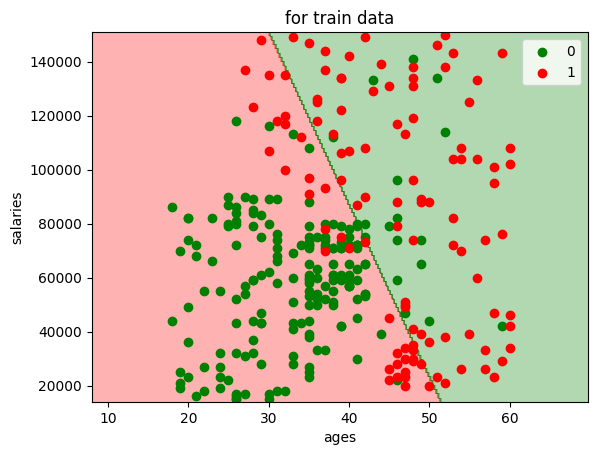

In [56]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min()-10,
                               X_set[:, 0].max()+10,
                               step = 0.25),
                     np.arange(X_set[:, 1].min()-1000, 
                               X_set[:, 1].max()+1000,
                               step = 100))
Z0 = np.array([X1.ravel(), X2.ravel()]).T
Z1 = sc.transform(Z0)
Z  = classifier.predict(Z1).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha = 0.3,
             cmap = ListedColormap(("red", "green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], 
                X_set[y_set == j, 1],
                c = ListedColormap(("green", "red"))(i),
                label = j)
plt.title("for train data")
plt.xlabel("ages")
plt.ylabel("salaries")
plt.legend()
plt.show()

C:\Users\whelm\AppData\Local\Temp\ipykernel_27392\803365018.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0],


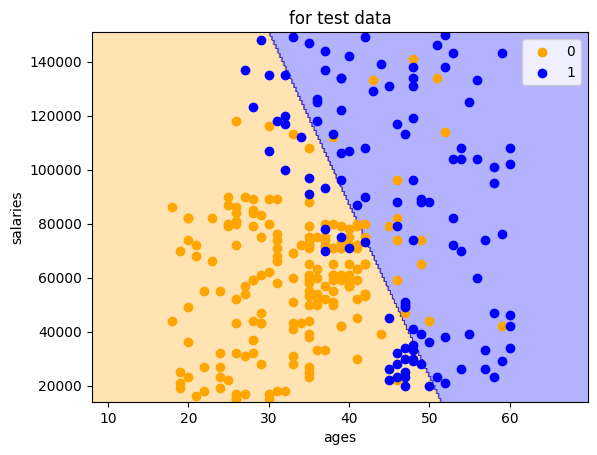

In [63]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min() - 10,
                               X_set[:, 0].max() + 10,
                               step = 0.25),
                               np.arange(X_set[:, 1].min() - 1000,
                                         X_set[:, 1].max() + 1000,
                                         step = 100))
Z0 = np.array([X1.ravel(), X2.ravel()]).T
Z1 = sc.transform(Z0)
Z = classifier.predict(Z1).reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha = 0.3, 
             cmap = ListedColormap(("orange", "blue")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())    
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0],
                X_set[y_set == j, 1],
                c = ListedColormap(("orange", "blue"))(i), 
                label = j)
plt.title("for test data")
plt.xlabel("ages")
plt.ylabel("salaries")
plt.legend()
plt.show()
